In [631]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import numpy as np
from numpy import vectorize


In [632]:
ang =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
        60, 30, 0, -15, -30,

        16, 17, 18, 19, 20,
        75, 135, 45, 45, -60,

        26, 27, 28, 29, 30,
        90, 135, 0, -45, -90,

        36, 37, 38, 39, 40,
        120, -135, -135, -45, -105,

        46, 47, 48, 49, 50,
        150, 165, 180, -150, -120]

In [633]:
masc = [0, 3, 6, 9]
masl = [-1.5, 1.5, 4.5, 7.5, 10.5]

v = 0.9
deceleration = 2

from math import pi, sin ,cos
ang =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
        60, 30, 0, -15, -30,

        16, 17, 18, 19, 20,
        75, 135, 45, 45, -60,

        26, 27, 28, 29, 30,
        90, 135, 0, -45, -90,

        36, 37, 38, 39, 40,
        120, -135, -135, -45, -105,

        46, 47, 48, 49, 50,
        150, 165, 180, -150, -120]


def rule(x, i):
    if i == 0:
        if x <= masl[0]:
            return 1
        elif x > masl[0] and x < masl[1]:
            return (masl[1] - x) / (masl[1] - masl[0])
    elif i == 4:
        if x >= masl[4]:
            return 1
        elif x > masl[3] and x < masl[4]:
            return (x - masl[3]) / (masl[4] - masl[3])
    else:
        if x > masl[i-1] and x < masl[i]:
            return (x - masl[i-1]) / (masl[i] - masl[i-1])
        elif x > masl[i] and x < masl[i+1]:
            return (masl[i+1] - x) / (masl[i+1] - masl[i])
    return 0

def axy(i, j):
    ans = 0
    i += 1
    j+= 1
    k=j*10+i
    ans = cos(ang[k]/180*pi) + sin(ang[k]/180*pi) * (1j) 
    if k == 33:
        ans = 0
    return ans

def rules(x, y):
    masx = []
    masy = []
    for i in range(5):
        for j in range(5):
            vx = rule(x, j)
            vy = rule(y, i)
            if vx != 0 and vy != 0:
                masx.append(axy(i,j) * vx) 
                masy.append(axy(i,j) * vy) 
    ans = np.average(masx) + np.average(masy) * (1j)
    return ans

def vec(pos):
    x_full = pos.real
    y_full = pos.imag
    return rules(x_full, y_full) * v
    
    

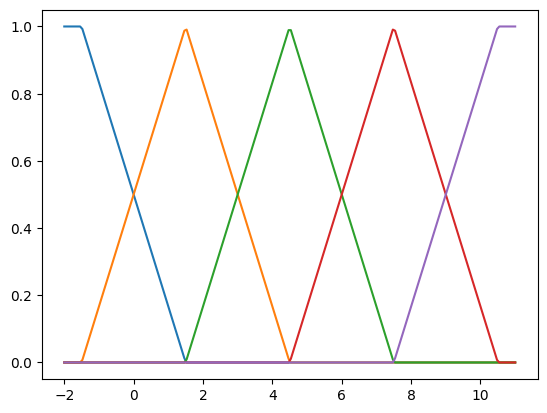

In [634]:
x = np.linspace(-2,11,200)
for i in range(5):
    V1 = vectorize(lambda x: rule(x, i), otypes=[np.float64])   
    plt.plot(x, V1(x))

In [635]:
def move(pos, speed):
    acceleration = vec(pos)
    speed += acceleration
    speed /= deceleration
    pos += speed
    return pos, speed

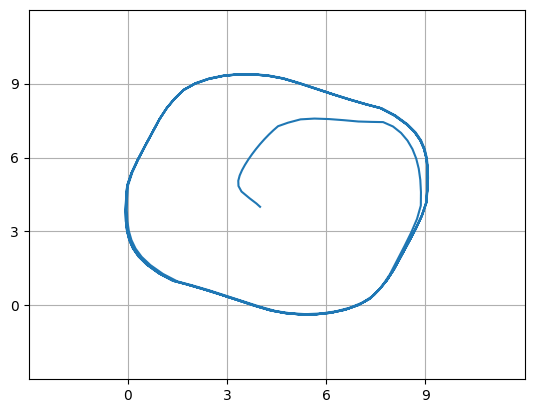

<Figure size 1000x1000 with 0 Axes>

In [636]:
pos = 4+4j
speed = 0.1 
wayx = [pos.real]
wayy = [pos.imag]
for t in range(300):
    pos, speed = move(pos, speed)
    wayx.append(pos.real)
    wayy.append(pos.imag)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(FixedLocator([i for i in masc]))
ax.yaxis.set_major_locator(FixedLocator([i for i in masc]))
ax.grid(True)
plt.xlim([-3, 12])
plt.ylim([-3, 12])
plt.figure(figsize=(10,10))
ax.plot(wayx, wayy)

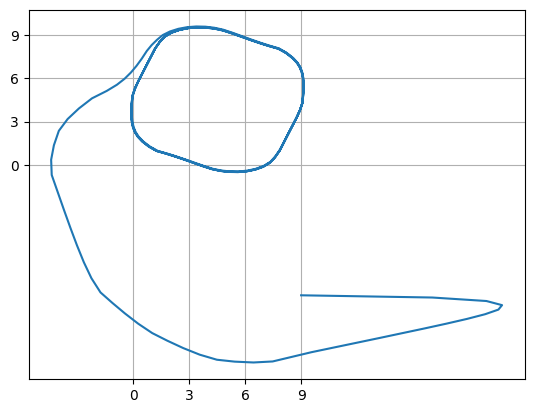

<Figure size 1000x1000 with 0 Axes>

In [637]:
pos = 9-9j
speed = 15
wayx = [pos.real]
wayy = [pos.imag]
for t in range(300):
    pos, speed = move(pos, speed)
    wayx.append(pos.real)
    wayy.append(pos.imag)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(FixedLocator([i for i in masc]))
ax.yaxis.set_major_locator(FixedLocator([i for i in masc]))
ax.grid(True)

# plt.xlim([-3, 12])
# plt.ylim([-3, 12])
plt.figure(figsize=(10,10))
ax.plot(wayx, wayy)